In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pyclust import KMedoids

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
X = pd.read_csv('data.csv', header=None)

In [3]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.055755,0.000000,0.000000
2,0.042250,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.093693,0.000000,0.099296,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.069105,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.036811,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.041917,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.029440,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.018781,0.068565,0.000000,0.0,0.0,0.0,0.0,0.010340,0.030426,0.091669
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.043129,0.126913,0.000000
8,0.000000,0.168955,0.000000,0.0,0.000000,0.000000,0.085074,0.0,0.0,0.0,...,0.000000,0.122644,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.089189,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [6]:
# Using the elbow method to find the optimal number of clusters - KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[18320.802108909407,
 18038.0333455535,
 17871.676365340332,
 17737.463684887032,
 17619.840651042265,
 17501.511444298143,
 17417.359871368746,
 17296.100297765472,
 17211.336581332733,
 17100.309113856787]

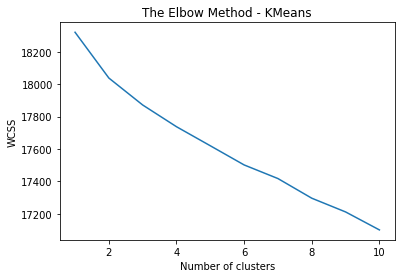

In [9]:
# Plotting the Elbow Method

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method - KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It hasn't been clear the right number of clusters, since the Elbow Method didn't create an "elbow" itself.
We are going to use another strategy to find the right number of clusters, based on the Silhouette Score.

For n_clusters = 2 The average silhouette_score is : 0.412333486469


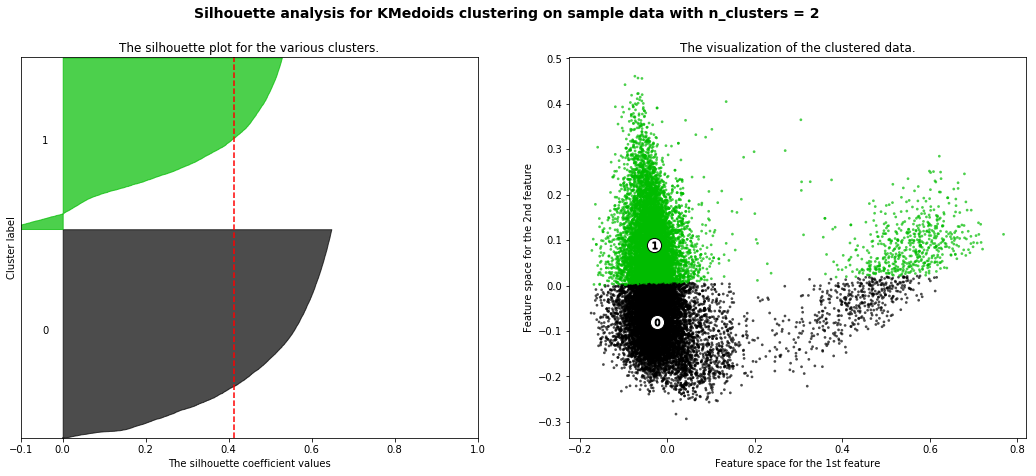

For n_clusters = 3 The average silhouette_score is : 0.500582790709


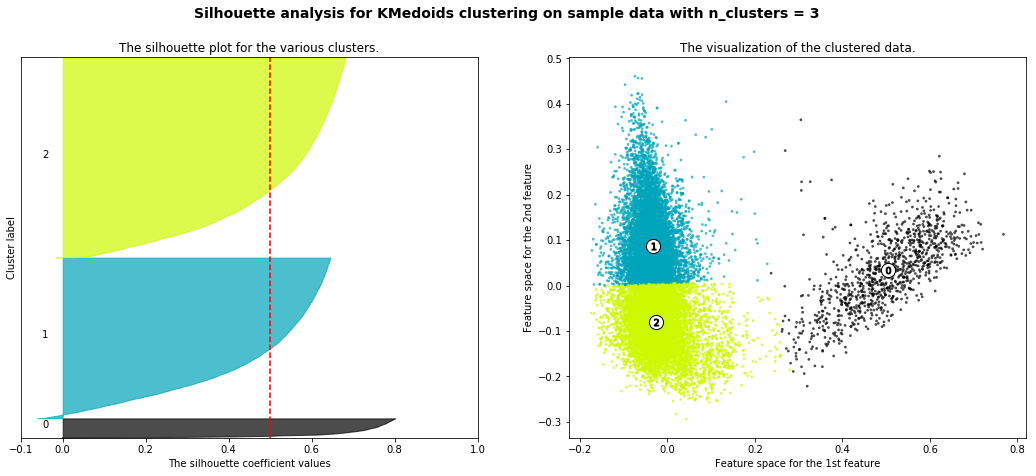

For n_clusters = 4 The average silhouette_score is : 0.411042605545


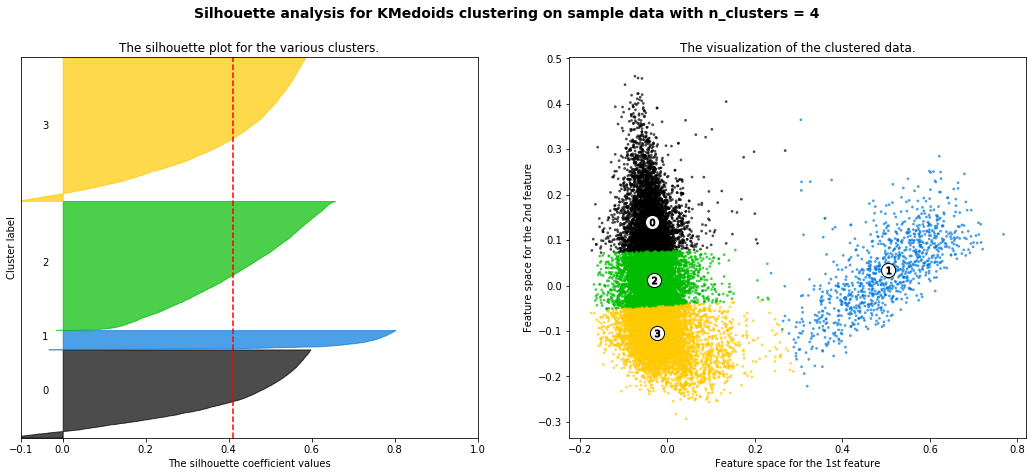

For n_clusters = 5 The average silhouette_score is : 0.35682589848


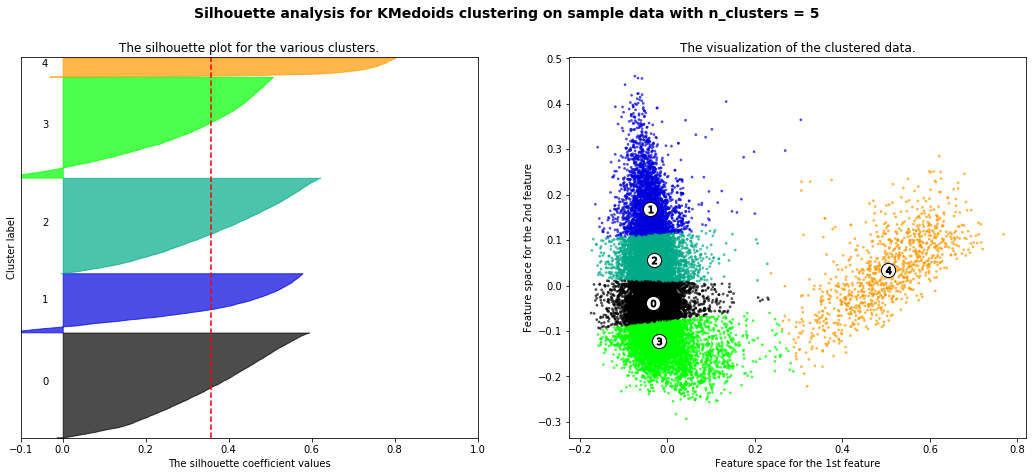

For n_clusters = 6 The average silhouette_score is : 0.324846239229


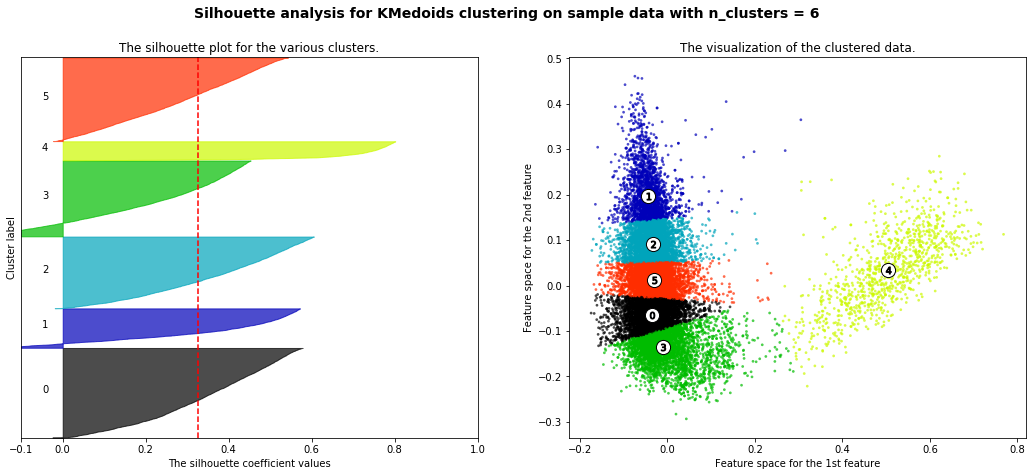

In [12]:
range_n_clusters = [2, 3, 4, 5, 6]

X_reduced = PCA(n_components=2, random_state = 42).fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMedoids clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.730155873296


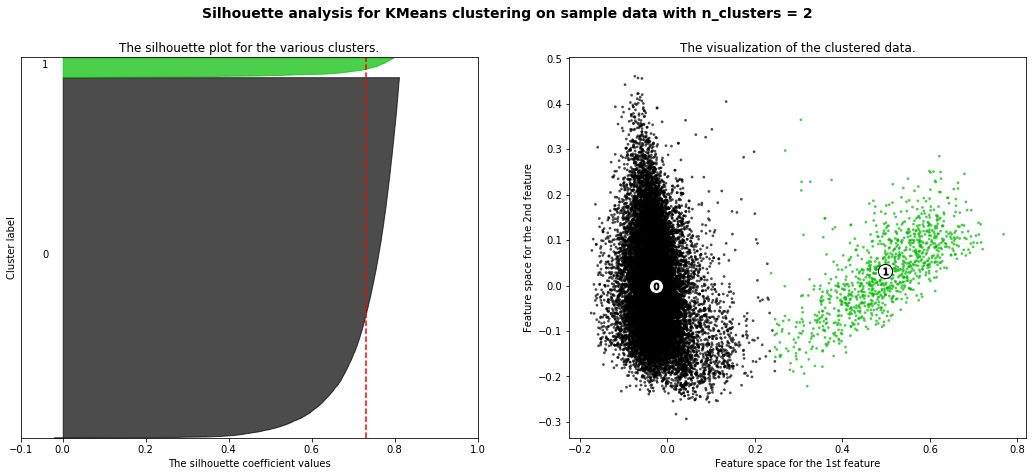

For n_clusters = 3 The average silhouette_score is : 0.503406224515


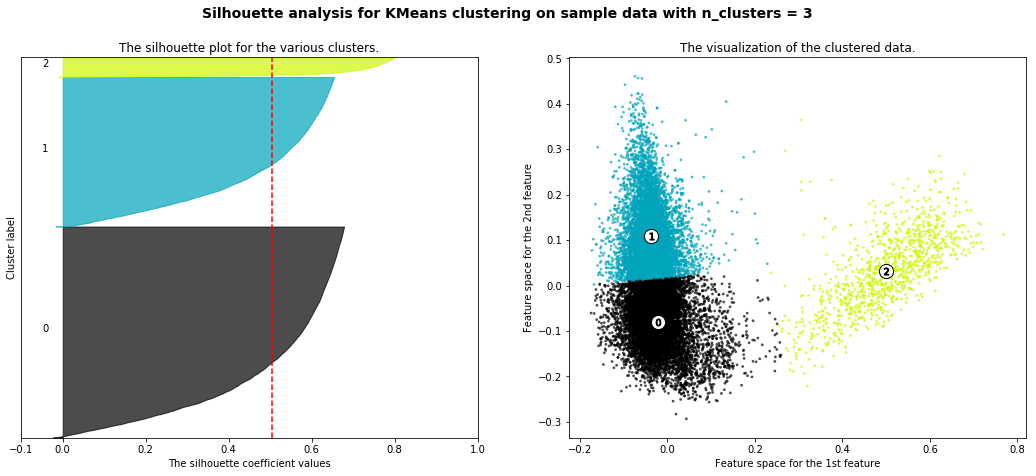

For n_clusters = 4 The average silhouette_score is : 0.422885225441


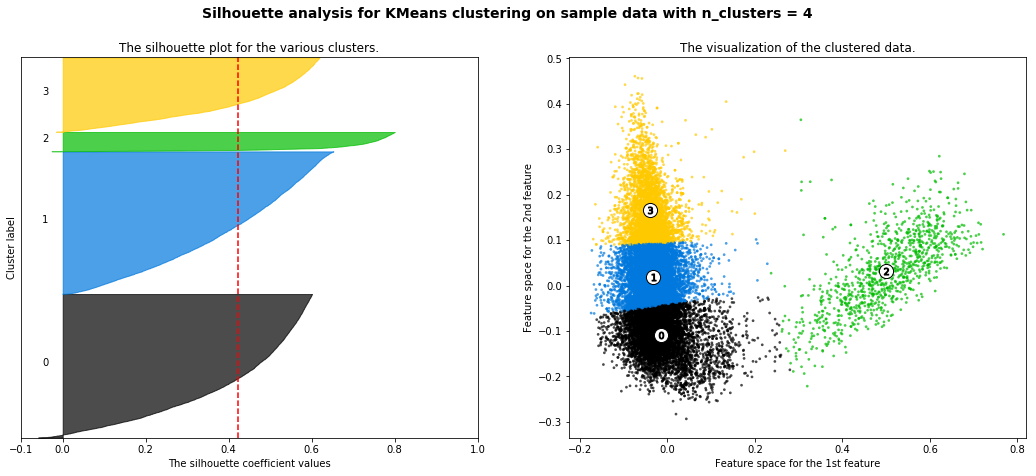

For n_clusters = 5 The average silhouette_score is : 0.374245902485


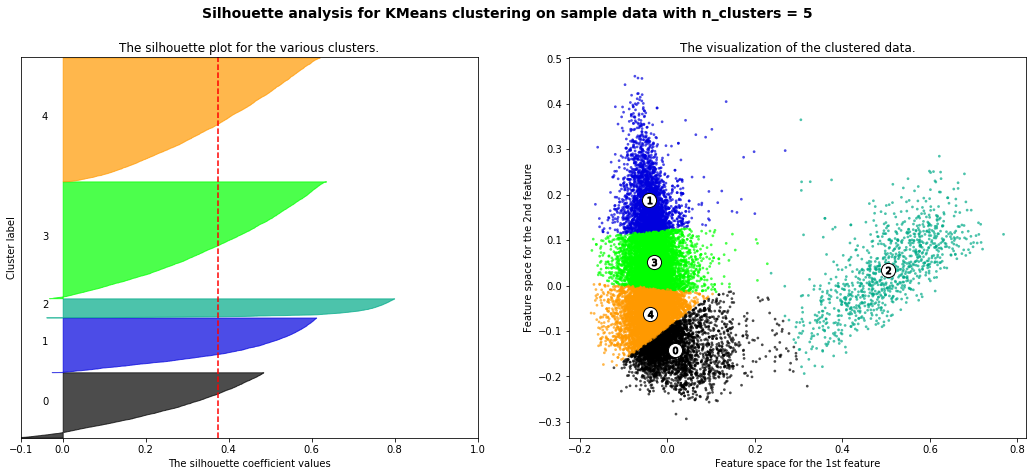

For n_clusters = 6 The average silhouette_score is : 0.377416969212


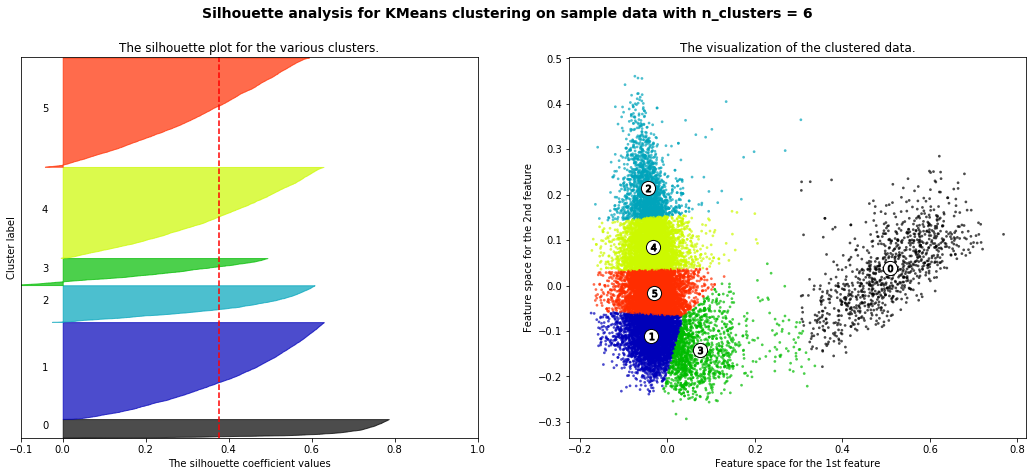

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]

X_reduced = PCA(n_components=2, random_state = 42).fit_transform(X)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Using the Silhouette Score Method, and using KMedoids, the best score was 0.5003 for k=3 and 0.4123 for k=2.

Comparing with KMeans, we have a score of 0.7301 for k=2 and 0.5034 for k=3.

So, it's safe to say that a secure range of clusters to use is [2,3].

Visually speaking, 2 components seems to fit better the data, so we are going to use k=2 from now on.

Now we are going to use different dimensions reductions with PCA. We are gonna test 5 different reductions and apply clustering, comparing scores.

In [ ]:
# PCA and KMedoids

components = [1656, 1105, 552, 221, 2] # 75%, 50%, 25%, 10%, 2 components

scores = []
for i in components:
    X_reduced = PCA(n_components = i, random_state = 42).fit_transform(X)

    kmed = KMedoids(n_clusters = 2, random_state = 42)
    y_kmed = kmed.fit_predict(X_reduced)
    scores.append(silhouette_score(X_reduced, y_kmed))

scores

In [ ]:
# Reducing the dimension of the data
X_reduced = PCA(n_components = 2, random_state = 42).fit_transform(X)

kmed = KMedoids(n_clusters = 2, random_state = 42)
y_kmed = kmed.fit_predict(X_reduced)

# Visualising the clusters
plt.scatter(X_reduced[y_kmed == 0, 0], X_reduced[y_kmed == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_reduced[y_kmed == 1, 0], X_reduced[y_kmed == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title("Visualizating of Clusters using KMedoids with 2 clusters")
plt.legend()
plt.show()